In [ ]:
import struct  # 用于读取字节。
import matplotlib.image as mpimg  # mpimg 用于读取图片
import matplotlib.pyplot as plt  # plt 用于显示图片
import numpy as np # numpy


class bmp:
    def __init__(self, tp):
        self.tag = tp[0]  # 标签
        self.fileSize = tp[1]  # 文件大小
        self.rgbOffset = tp[4]  # rgb偏移量
        self.infoSize = tp[5]  # 头部所需字节
        self.width = tp[6]  # 宽度
        self.height = tp[7]  # 高度
        self.pane = tp[8]  # 颜色板
        self.color = tp[9]  # 颜色种类
        self.compress = tp[10]  # 压缩
        self.rgbSize = tp[11]  # rgb大小

    def print_bmp_header(self):
        print("tag      :{}".format(self.tag))
        print("fileSize :{}".format(self.fileSize))
        print("rgbOffset:{}".format(self.rgbOffset))
        print("infoSize :{}".format(self.infoSize))
        print("width    :{}".format(self.width))
        print("height   :{}".format(self.height))
        print("pane     :{}".format(self.pane))
        print("color    :{}".format(self.color))
        print("compress :{}".format(self.compress))
        print("rgbSize  :{}".format(self.rgbSize))


f = open('Lena.bmp', 'rb')
bmp_header_b = f.read(0x36)
bmp_header_s = struct.unpack('<2sI2H4I2H6I', bmp_header_b)  # 按bmp的数据形式解包
image = bmp(bmp_header_s)
image.print_bmp_header()

# pixels = np.array(image
for i in range(image.width):
    for j in range(image.height):
        pass


car = mpimg.imread('Lena.bmp')

car.shape  # (512, 512, 3)

plt.imshow(car)  # 显示图片
plt.axis('off')  # 不显示坐标轴
plt.show()


类型: b'BM' 
大小: 66614 
保留大小: 0 
位图数据偏移量: 1078 
位图信息头大小: 40 
宽度: 256 
高度: 256 
位图像素位数: 8


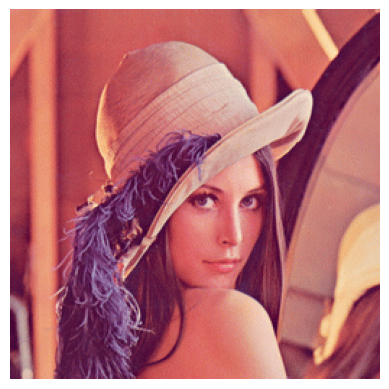

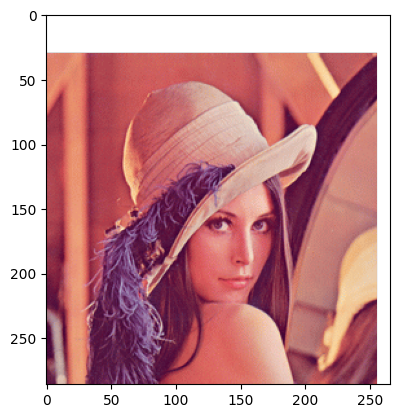

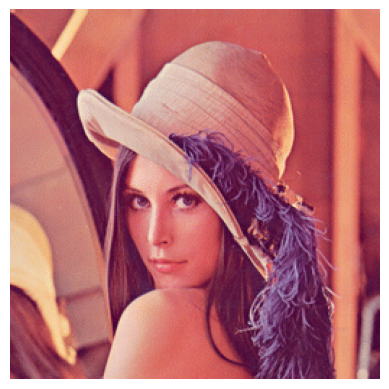

In [13]:
import  numpy as np
import struct
import matplotlib.pyplot as plt

class bmp_header:

    def __init__(self, f_type, f_sizeByte, f_reserved,
                f_offsetByte, f_bih_size, f_width, 
                f_height, f_bitcount):
        self.type = f_type
        self.sizeByte = f_sizeByte
        self.reserved = f_reserved
        self.offsetByte = f_offsetByte
        self.bihSize = f_bih_size
        self.width = f_width
        self.height = f_height
        self.bitcount = f_bitcount

    def printBitMapHeaderInfo(self):
            print("类型:", self.type, 
                "\n大小:", self.sizeByte,
                "\n保留大小:", self.reserved,
                "\n位图数据偏移量:", self.offsetByte,
                "\n位图信息头大小:", self.bihSize,
                "\n宽度:", self.width,
                "\n高度:", self.height,
                "\n位图像素位数:", self.bitcount)

class bmp:
    def __init__(self, filename):
        self.fileName = filename

    def loadBmp(self):
        self.__loadBmpFileHeader()
        self.__loadBmpColorsTable()
        self.__loadBmpBits()

    def drawBmp(self):
        plt.imshow(self.img)
        plt.axis('off')  # 不显示坐标轴
        plt.show()

    def translateBmp(self, x=0, y=0):
        '''
        x平移量表示左右移动:x>0,图像右移; x<0,图像左移
        y平移量表示上下移动:y>0,图像下移; y<0,图像上移
        '''
        newImg = np.empty(shape=(self.bmpHeader.height+abs(y), self.bmpHeader.width+abs(x), 4), dtype= int)
        dx = x if (x>0) else 0
        dy = y if (y>0) else 0
        
        for i in range(0, self.bmpHeader.height):
            for j in range(0, self.bmpHeader.width):
                newImg[i+dy][j+dx] = self.img[i][j]

        plt.imshow(newImg)
        plt.show()
        
    def mirrorImageReversal(self, option='LeftAndRight'):
        if option=='LeftAndRight':
            newImg = np.empty(shape=(self.bmpHeader.height, self.bmpHeader.width, 4), dtype= int)
            for i in range(0, self.bmpHeader.height):
                for j in range(0, self.bmpHeader.width):
                    newImg[i, j] = self.img[i, 255-j]
        elif option=='UpAndDown':
            newImg = np.empty(shape=(self.bmpHeader.height, self.bmpHeader.width, 4), dtype= int)
            for i in range(0, self.bmpHeader.height):
                for j in range(0, self.bmpHeader.width):
                    newImg[i, j] = self.img[255-i, j]
        elif option=='BothReversal':
            newImg = np.empty(shape=(self.bmpHeader.width, self.bmpHeader.height, 4), dtype= int)
            for i in range(0, self.bmpHeader.height):
                for j in range(0, self.bmpHeader.width):
                    newImg[i, j] = self.img[255-i, 255-j]
        
        plt.imshow(newImg)
        plt.axis('off')
        plt.show()
                

    def __loadBmpFileHeader(self):
        '''读取位图信息
        '''
        f = open(self.fileName,'rb') 
        '下面部分用来读取BMP位图的基础信息'
        f_type = str(f.read(2))                     # 文件类型 需要读取2个字节
        file_size_byte = f.read(4)                  # 读取文件的大小 需要读取4个字节
        file_reserved = f.read(4)                   # 保留字段
        file_ofset_byte = f.read(4)                 # 读取位图数据的偏移量
        file_bmpInfoHeader_size = f.read(4)         # 读取位图信息头长度
        file_wide_byte = f.read(4)                  # 读取宽度字节
        file_height_byte = f.read(4)                # 读取高度字节
        file_planes = f.read(2)                     # 读取位图位面数，忽略
        file_bitcount_byte = f.read(4)              # 得到每个像素占位大小

        # 下面就是将读取的字节转换成指定的类型
        f_size, = struct.unpack('l',file_size_byte)
        f_reserved, = struct.unpack('i', file_reserved)
        f_offset, = struct.unpack('l',file_ofset_byte)
        f_bih_size, = struct.unpack('i', file_bmpInfoHeader_size)
        f_wide, = struct.unpack('l',file_wide_byte)
        f_height, = struct.unpack('l',file_height_byte)
        f_bitcount, = struct.unpack('i',file_bitcount_byte)

        self.bmpHeader = bmp_header(f_type, f_size, f_reserved, f_offset, 
                                    f_bih_size, f_wide, f_height, f_bitcount)
        f.close()

    def __loadBmpColorsTable(self):
        f = open(self.fileName,'rb')
        # 读取颜色表
        self.color_table = np.empty(shape=[256,4],dtype=int)
        f.seek(54) # 跳过文件信息头和位图信息头
        for i in range(0,256):
            b = struct.unpack('B',f.read(1))[0];
            g = struct.unpack('B', f.read(1))[0];
            r = struct.unpack('B', f.read(1))[0];
            alpha = struct.unpack('B', f.read(1))[0];
            self.color_table[i][0] = r
            self.color_table[i][1] = g
            self.color_table[i][2] = b
            self.color_table[i][3] = 255
        f.close()
        
    # 显示，灰度化，读图像信息
    def __loadBmpBits(self):
        # 打开文件
        f = open(self.fileName,'rb') 

        # 读取BMP位图数据区域,将数据存入numpy数组
        # 首先对文件指针进行偏移
        f.seek(self.bmpHeader.offsetByte)
        # 因为图像是8位伪彩色图像，所以一个像素点占一个字节，即8位
        self.img = np.empty(shape=[self.bmpHeader.height, self.bmpHeader.width, 4], dtype=int)
        cout = 0
        for y in range(0, self.bmpHeader.height):
            for x in range(0, self.bmpHeader.width):
                cout = cout + 1
                index=struct.unpack('B',f.read(1))[0]
                self.img[self.bmpHeader.height-y-1, x] = self.color_table[index]
            while (cout % 4) != 0:
                f.read(1)
                cout = cout + 1
        f.close()


    

def main():
    m_bmp = bmp("Lena.BMP")
    m_bmp.loadBmp()
    m_bmp.bmpHeader.printBitMapHeaderInfo()
    m_bmp.drawBmp()
    m_bmp.translateBmp(-10, 30)
    m_bmp.mirrorImageReversal('LeftAndRight')


if __name__ == '__main__':
    main()


In [ ]:
# 图像平移
import  numpy as np
import struct
import matplotlib.pyplot as plt

imgMatrix = np.empty(shape=(256,256,4), dtype=int)  # 实际为[y, x]
newImgMatrix = np.empty(shape=(270,280,4), dtype=int)
count = 0
f = open("Lena.BMP",'rb')
# 读取颜色表
color_table = np.empty(shape=[256,4],dtype=int)
f.seek(54) # 跳过文件信息头和位图信息头
for i in range(0,256):
    b = struct.unpack('B',f.read(1))[0];
    g = struct.unpack('B', f.read(1))[0];
    r = struct.unpack('B', f.read(1))[0];
    alpha = struct.unpack('B', f.read(1))[0];
    color_table[i][0] = r
    color_table[i][1] = g
    color_table[i][2] = b
    color_table[i][3] = 255

with open("Lena.BMP", 'rb') as bmpfile:
    f.seek(0x436)
    for y in range(0, 256):
        for x in range(0, 256):
            count += 1
            index = struct.unpack('B', f.read(1))[0]
            imgMatrix[256 - y - 1, x] = color_table[index]
        while(count%4 != 0):
            count += 1
            f.read(1)

plt.imshow(imgMatrix)
plt.show()

for i in range(0, 256):
    for j in range(0, 256):
        newImgMatrix[i+14, j+24] = imgMatrix[i][j]

plt.imshow(newImgMatrix)
plt.show()

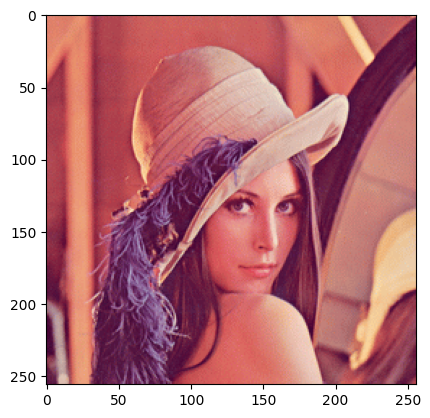

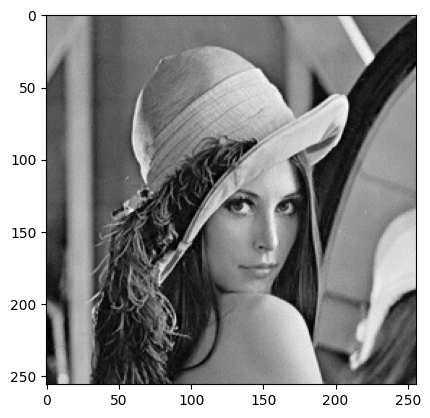

28 168
32 193
33 214
38 968
39 65
41 667
43 1396
44 167
47 1627
49 1350
51 238
53 804
55 1239
56 189
59 400
60 271
61 608
63 394
64 70
65 619
68 421
70 525
72 206
73 248
74 541
75 145
77 295
78 221
79 161
80 458
81 129
82 522
86 57
87 946
88 514
90 166
91 52
92 1105
93 225
94 64
96 1582
98 631
99 249
100 228
102 1808
103 289
104 34
105 452
106 22
107 1041
109 537
111 310
112 952
113 41
114 154
115 454
116 91
117 1134
118 33
119 737
120 109
121 774
122 85
123 462
124 351
125 36
126 2186
128 50
129 1721
131 392
132 446
133 783
134 19
135 1138
136 137
137 379
139 1663
140 554
141 862
143 65
144 1242
146 882
147 1214
148 633
150 52
151 1006
152 1528
153 279
154 219
155 476
156 1651
157 97
158 126
159 20
160 1095
161 774
163 276
164 206
166 703
167 398
168 534
169 170
171 158
173 1126
174 470
176 171
177 182
178 358
179 501
182 305
183 195
184 103
185 309
187 163
189 550
190 139
191 174
192 30
193 137
195 144
196 1025
198 4
199 464
200 277
201 183
203 334
204 199
205 151
206 405
208 390
209

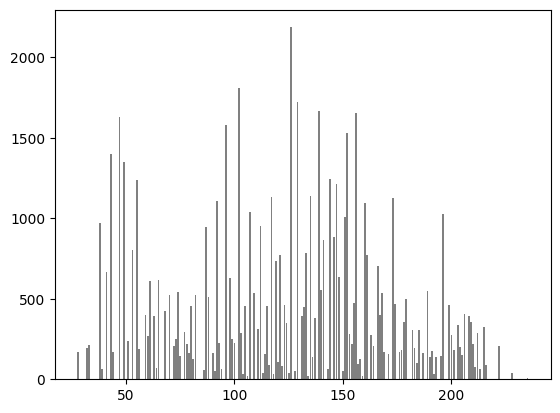

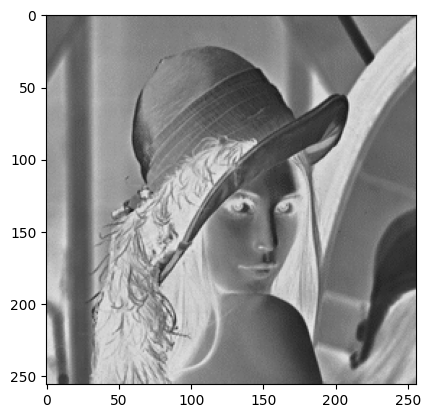

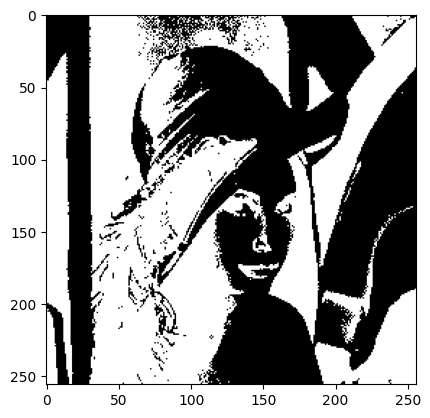

In [15]:
#灰度化
import  numpy as np
import struct
import matplotlib.pyplot as plt

imgMatrix = np.empty(shape=(256,256,4), dtype=int)  # 实际为[y, x]
newImgMatrix = np.empty(shape=(256,256,4), dtype=int)
count = 0
f = open("Lena.BMP",'rb')
# 读取颜色表
color_table = np.empty(shape=[256,4],dtype=int)
f.seek(54) # 跳过文件信息头和位图信息头
for i in range(0,256):
    b = struct.unpack('B',f.read(1))[0];
    g = struct.unpack('B', f.read(1))[0];
    r = struct.unpack('B', f.read(1))[0];
    alpha = struct.unpack('B', f.read(1))[0];
    color_table[i][0] = r
    color_table[i][1] = g
    color_table[i][2] = b
    color_table[i][3] = 255

with open("Lena.BMP", 'rb') as bmpfile:
    f.seek(0x436)
    for y in range(0, 256):
        for x in range(0, 256):
            count += 1
            index = struct.unpack('B', f.read(1))[0]
            imgMatrix[256 - y - 1, x] = color_table[index]
        while(count%4 != 0):
            count += 1
            f.read(1)

plt.imshow(imgMatrix)
plt.show()

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
newImgMatrix2 = rgb2gray(imgMatrix)
plt.imshow(newImgMatrix2, cmap=plt.get_cmap('gray'))
plt.show()


hdDict = dict()

for i in range(0, 256):
    for j in range(0, 256):
        newImgMatrix[i, j][3] = imgMatrix[i][j][0]*299/1000 + imgMatrix[i][j][1]*587/1000 + imgMatrix[i][j][2]*114/1000
        hdDict[newImgMatrix[i, j][3]] = hdDict.get(newImgMatrix[i, j][3], 0) + 1
        newImgMatrix[i, j][0] = newImgMatrix[i, j][1] = newImgMatrix[i, j][2] = 0

def sort_by_key(d):
    '''
    d.items() 返回元素为 (key, value) 的可迭代类型（Iterable），
    key 函数的参数 k 便是元素 (key, value)，所以 k[0] 取到字典的键。
    '''
    return sorted(d.items(), key=lambda k: k[0])


for item in dict(sort_by_key(hdDict)):
    print(item, hdDict[item])

sortedDict = dict(sort_by_key(hdDict))

plt.bar(list(sortedDict.keys()), sortedDict.values(), color='gray')
plt.show()

plt.imshow(newImgMatrix)

plt.show()

for i in range(0, 256):
    for j in range(0, 256):
        if(newImgMatrix[i,j][3] >= 128):
            newImgMatrix[i, j][3] = 255
        else:
            newImgMatrix[i, j][3] = 0

plt.imshow(newImgMatrix)
plt.show()

In [13]:
import PIL.Image as PILImage
import matplotlib.pyplot as plt

img = PILImage.open("Lena.BMP")
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
img = rgb2gray(img)
plt.imshow(img)
plt.show()


TypeError: 'BmpImageFile' object is not subscriptable